In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import datetime as dt


CONFIGURACIÓN BÁSICA

In [2]:
# establecer un tema
sns.set_theme(style="darkgrid") # opciones: darkgrid, whitegrid, dark, white, ticks

# temas disponibles	
print(sns.axes_style().keys())

# contexto(tamaño y escala)
sns.set_context("paper")  # opciones: paper, notebook, talk, poster


dict_keys(['axes.facecolor', 'axes.edgecolor', 'axes.grid', 'axes.axisbelow', 'axes.labelcolor', 'figure.facecolor', 'grid.color', 'grid.linestyle', 'text.color', 'xtick.color', 'ytick.color', 'xtick.direction', 'ytick.direction', 'lines.solid_capstyle', 'patch.edgecolor', 'patch.force_edgecolor', 'image.cmap', 'font.family', 'font.sans-serif', 'xtick.bottom', 'xtick.top', 'ytick.left', 'ytick.right', 'axes.spines.left', 'axes.spines.bottom', 'axes.spines.right', 'axes.spines.top'])


DATASETS INCORPORADOS

In [3]:
print(sns.get_dataset_names())

# cargar datos
tips = sns.load_dataset('tips')

print(tips.head())
 


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


GRÁFICOS DE DISTRIBUCIÓN

Permiten visuaizar la distribución de un variable continua

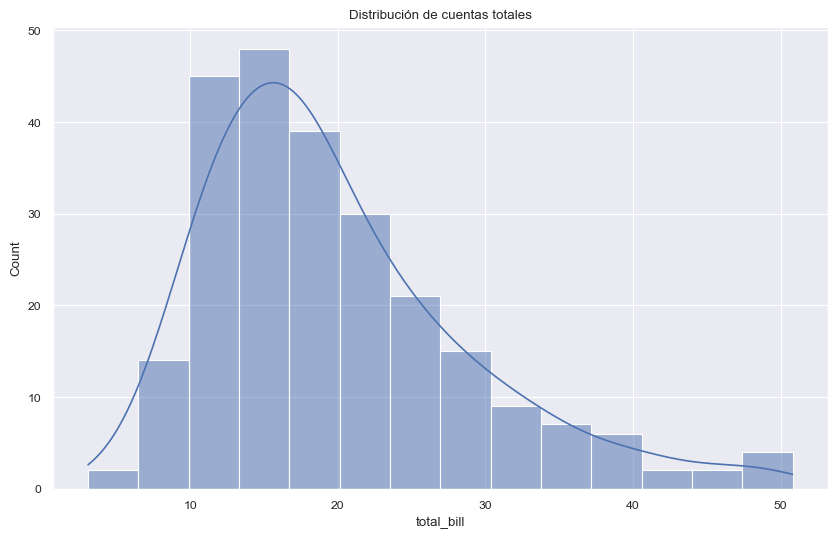

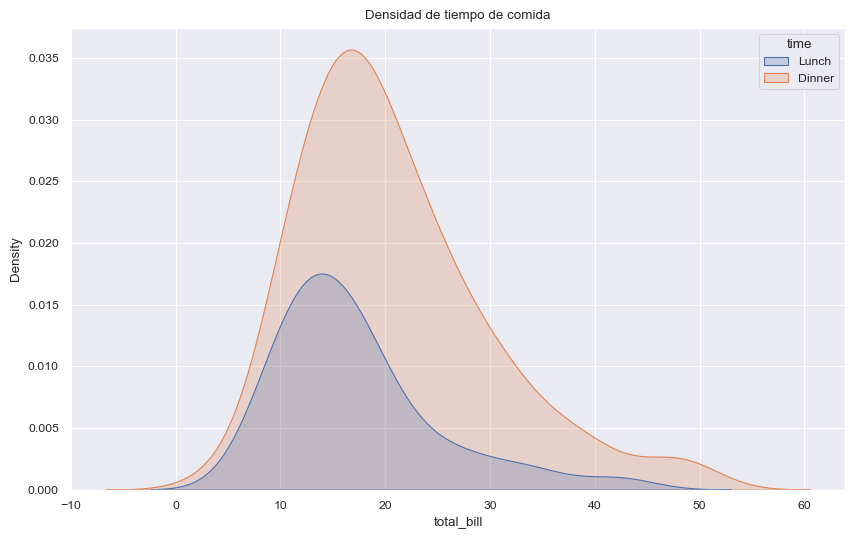

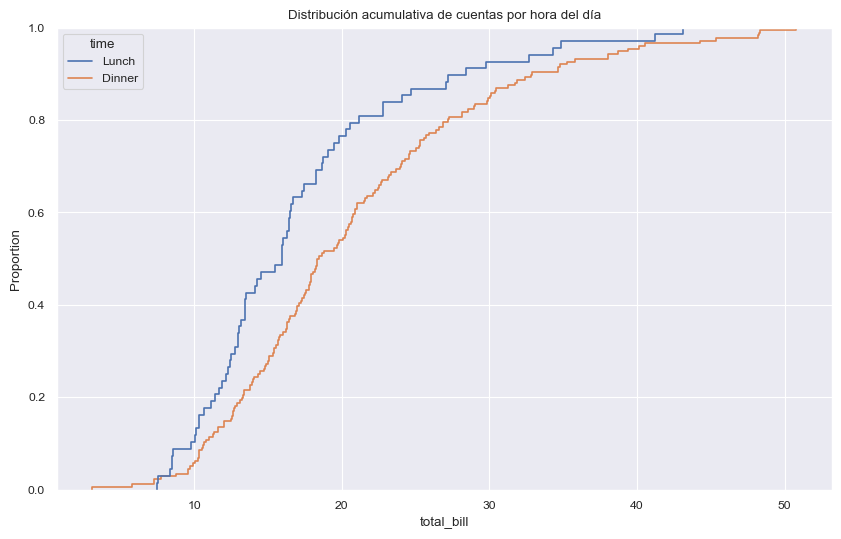

In [4]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=tips,x='total_bill', kde=True)
plt.title('Distribución de cuentas totales')
plt.show()

# Gráfico de Densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=tips, x='total_bill', hue='time', fill=True)
plt.title('Densidad de tiempo de comida')
plt.show()

# Distribución acumulativa empirica (ECDF)
plt.figure(figsize=(10,6))
sns.ecdfplot(data=tips, x='total_bill', hue='time')
plt.title('Distribución acumulativa de cuentas por hora del día')
plt.show()


GRÁFICOS CATEGÓRICOS

Permiten visualizar la distribución de una variable continua en función de una o más variables categóricas

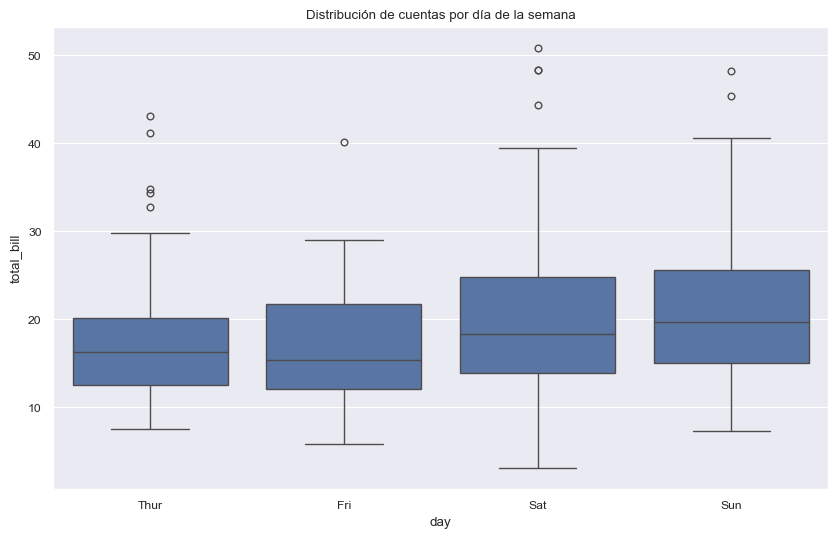

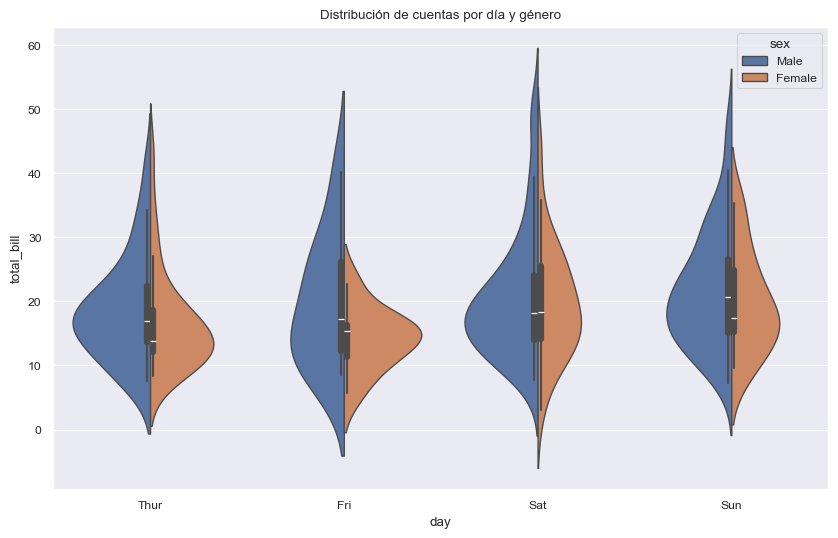

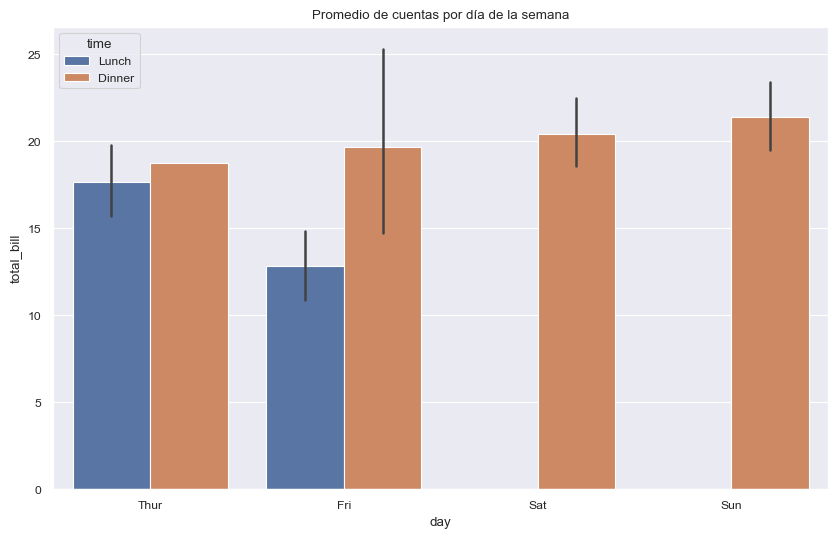

In [5]:
# Diagrama de caja (boxplot)
plt.figure(figsize=(10,6))
sns.boxplot(data=tips, x='day', y='total_bill')
plt.title('Distribución de cuentas por día de la semana')
plt.show()

# Diagrama de violín
plt.figure(figsize=(10,6))
sns.violinplot(data=tips, x='day', y='total_bill', hue='sex', split=True)
plt.title('Distribución de cuentas por día y género')
plt.show()

# Gráfico de barras(barplot)
plt.figure(figsize=(10,6))
sns.barplot(data=tips, x='day', y='total_bill', hue='time')
plt.title('Promedio de cuentas por día de la semana')
plt.show()

GRÁFICOS RELACIONALES

Permiten visualizar la relación entre dos o mas variables que son continuas

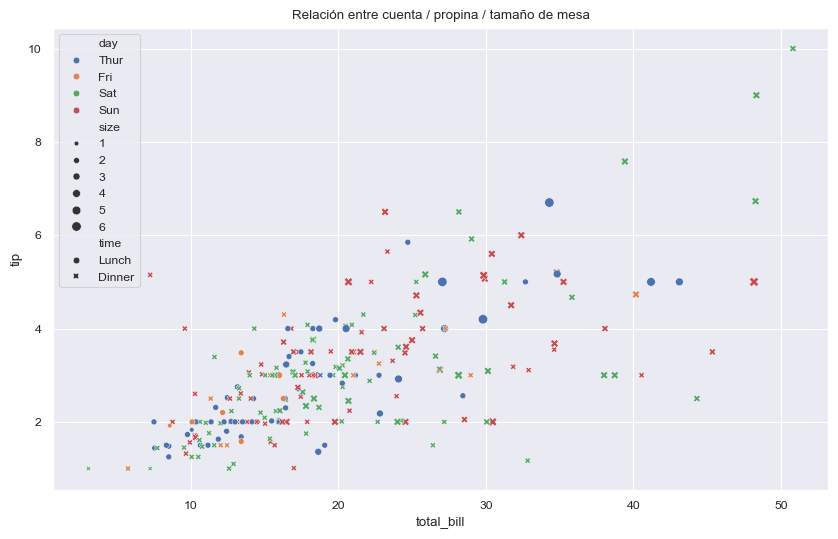

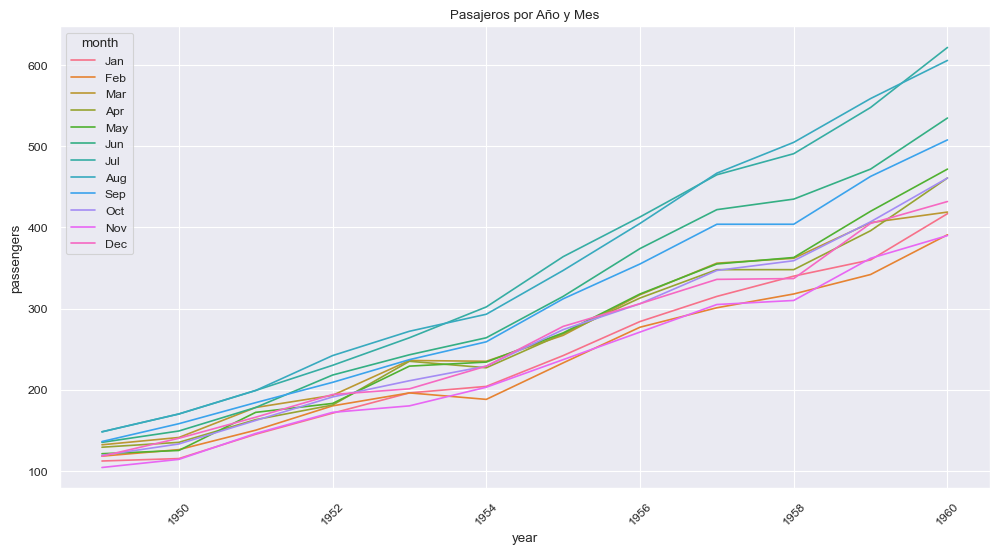

<function matplotlib.pyplot.show(close=None, block=None)>

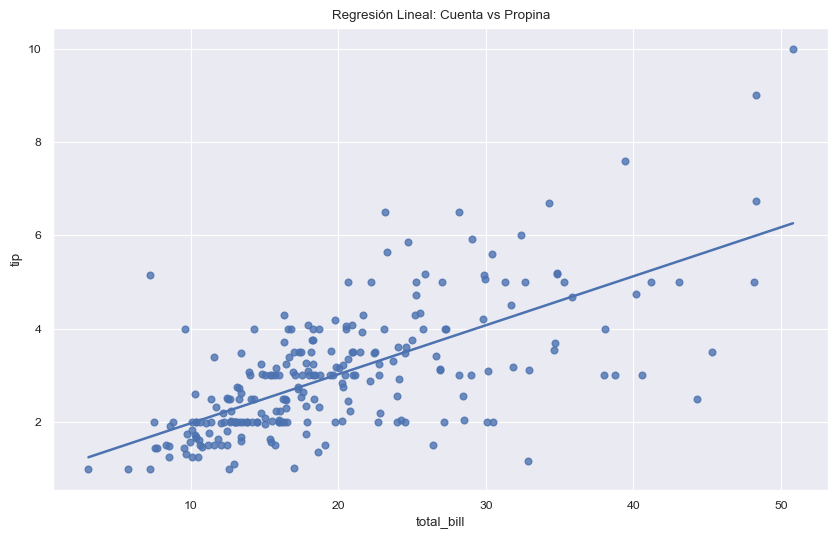

In [6]:
# gráfico de dispersión (scatterplot)
plt.figure(figsize=(10,6))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', style='time', size='size')
plt.title('Relación entre cuenta / propina / tamaño de mesa')
plt.show()

# gráfico de lineas (lineplot)
flights = sns.load_dataset('flights')
plt.figure(figsize=(12,6))
sns.lineplot(data=flights, x='year', y='passengers', hue='month')
plt.title('Pasajeros por Año y Mes')
plt.xticks(rotation=45)
plt.show()

# gráfico de regresion (regplot)
plt.figure(figsize=(10,6))
sns.regplot(data=tips, x='total_bill', y='tip', ci=None)
plt.title('Regresión Lineal: Cuenta vs Propina')
plt.show

GRÁFICOS MATRICIALES

Permiten visualizar datos en forma de matriz, como correlaciones o datos tabulares

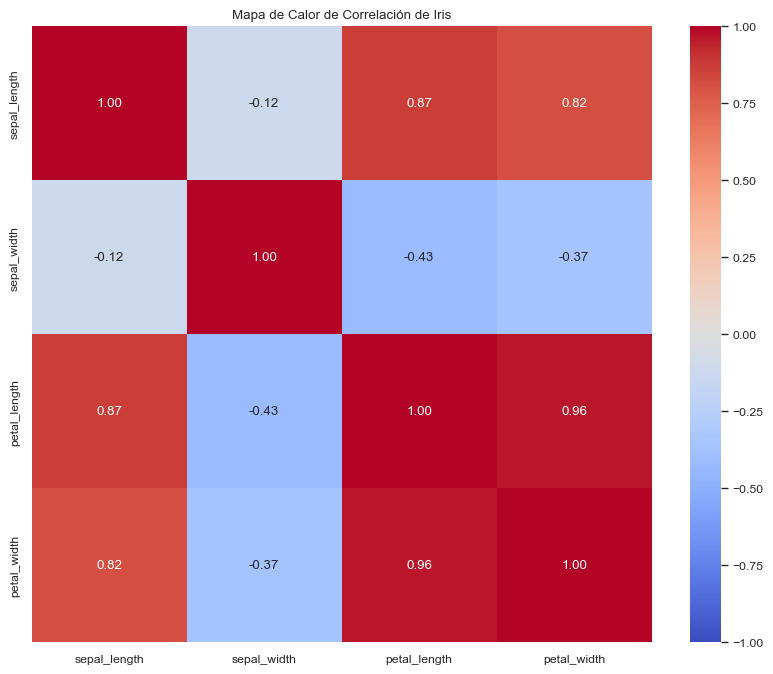

In [7]:
import scipy
iris = sns.load_dataset('iris')
corr = iris.drop('species', axis=1).corr()
# mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación de Iris')
plt.show()


GRÁFICOS MULTIPLOT

Seaborn ofrece varias clases para crear grids de múltiples gráficos que comparten ejes y leyendas

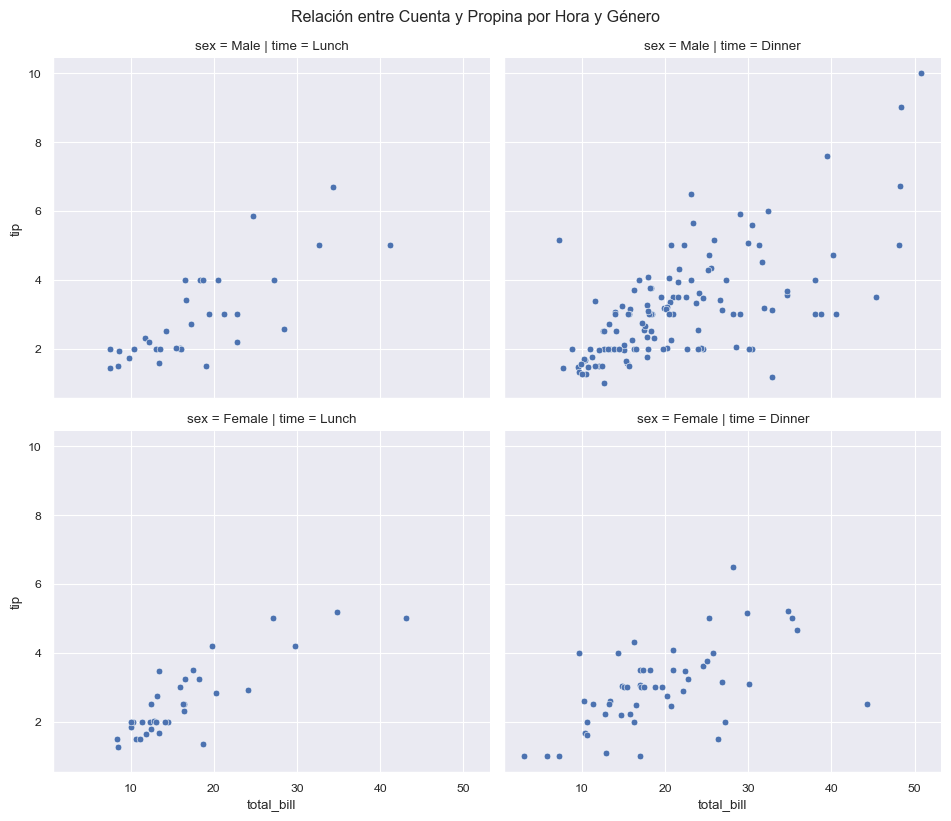

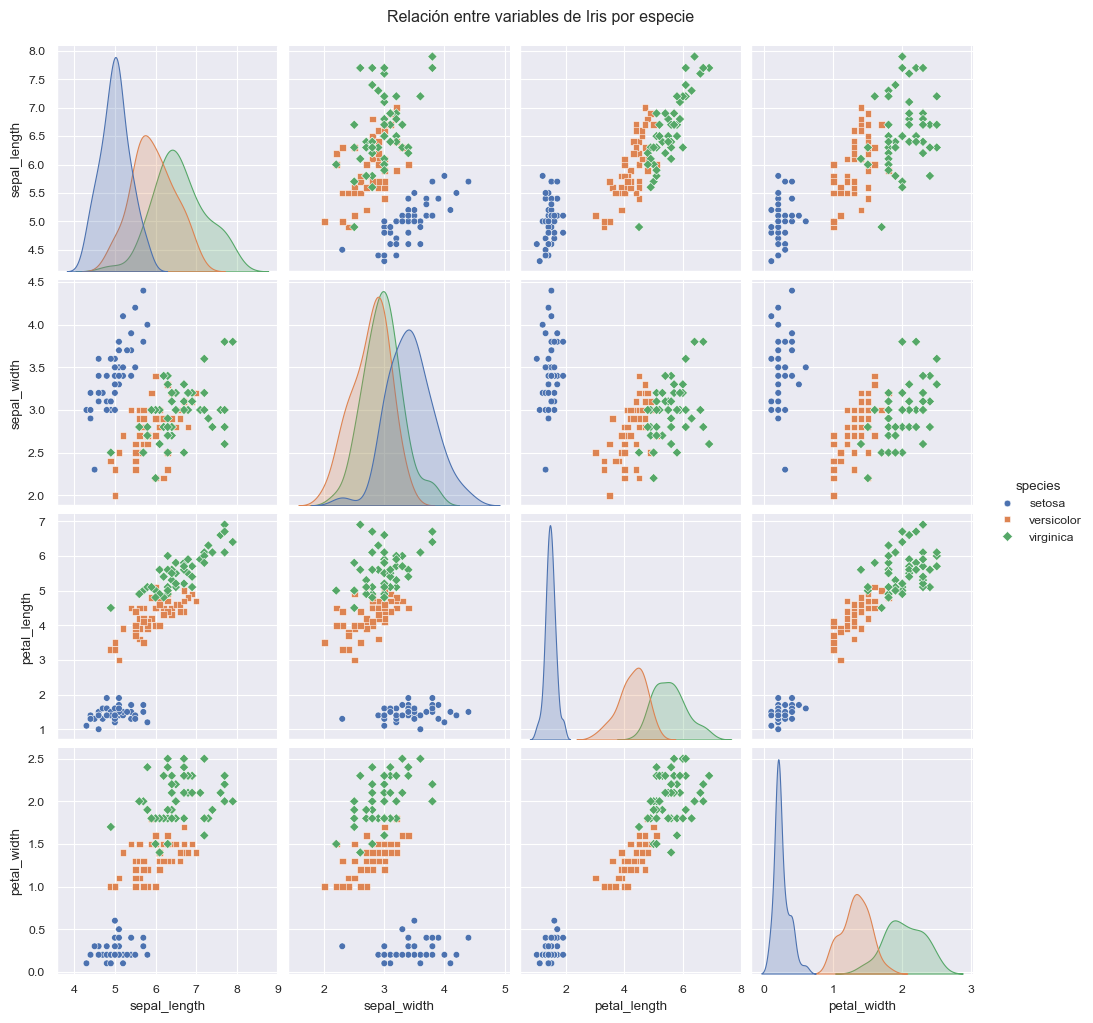

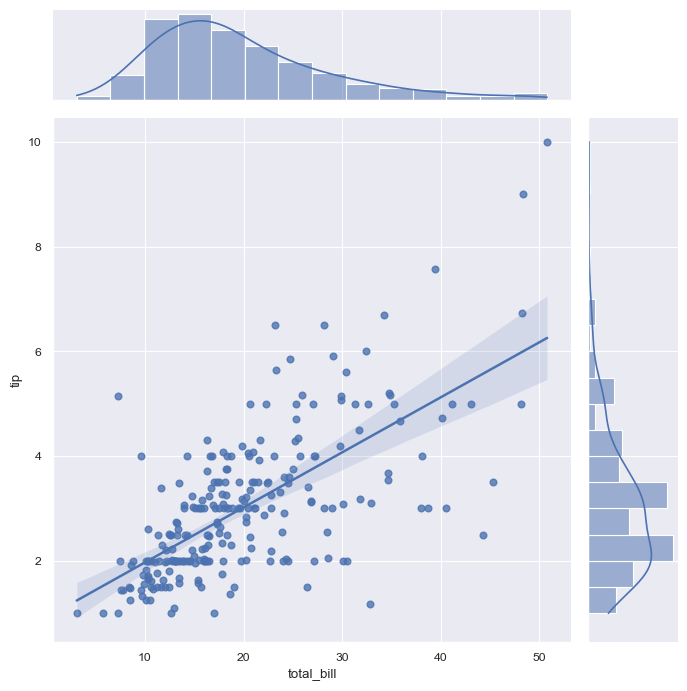

In [8]:
# FaceTGrid (FacetGrid)
g = sns.FacetGrid(tips, col='time', row='sex', height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.add_legend
g.fig.suptitle('Relación entre Cuenta y Propina por Hora y Género', y=1.02)
plt.show()

# pairplot
sns.pairplot(data=iris, hue='species', height=2.5, markers=["o", "s", "D"])
plt.suptitle('Relación entre variables de Iris por especie', y=1.02)
plt.show()

# Jointplot se utiliza para mostrar la relación entre dos variables y sus distribuciones marginales
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg',height=7)
plt.show()

PERSONALIZACIÓN Y ESTILOS

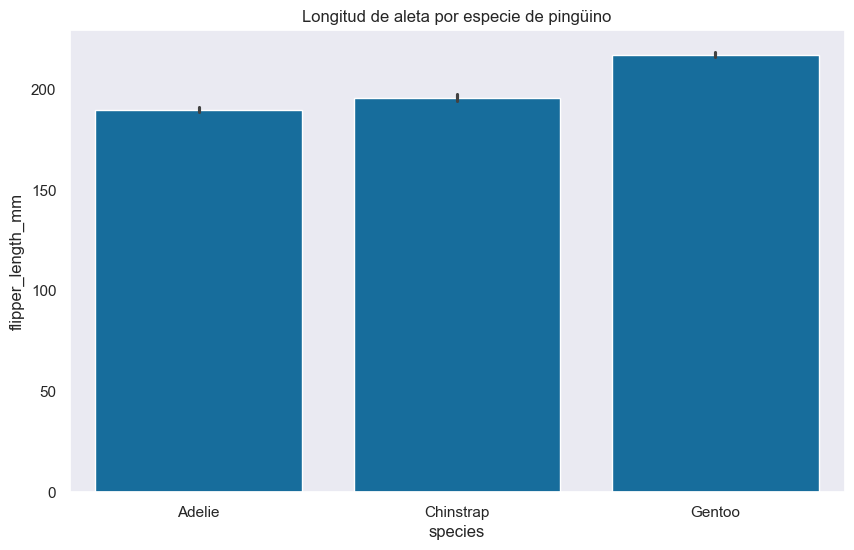

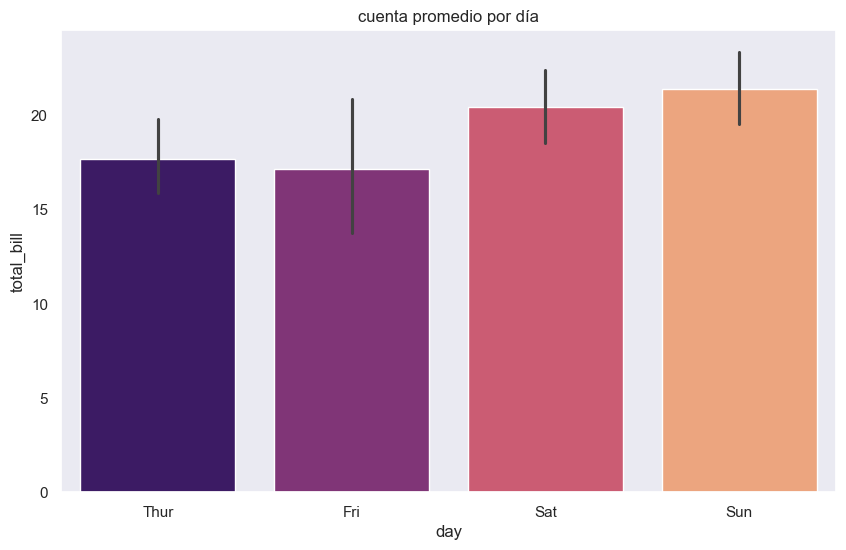

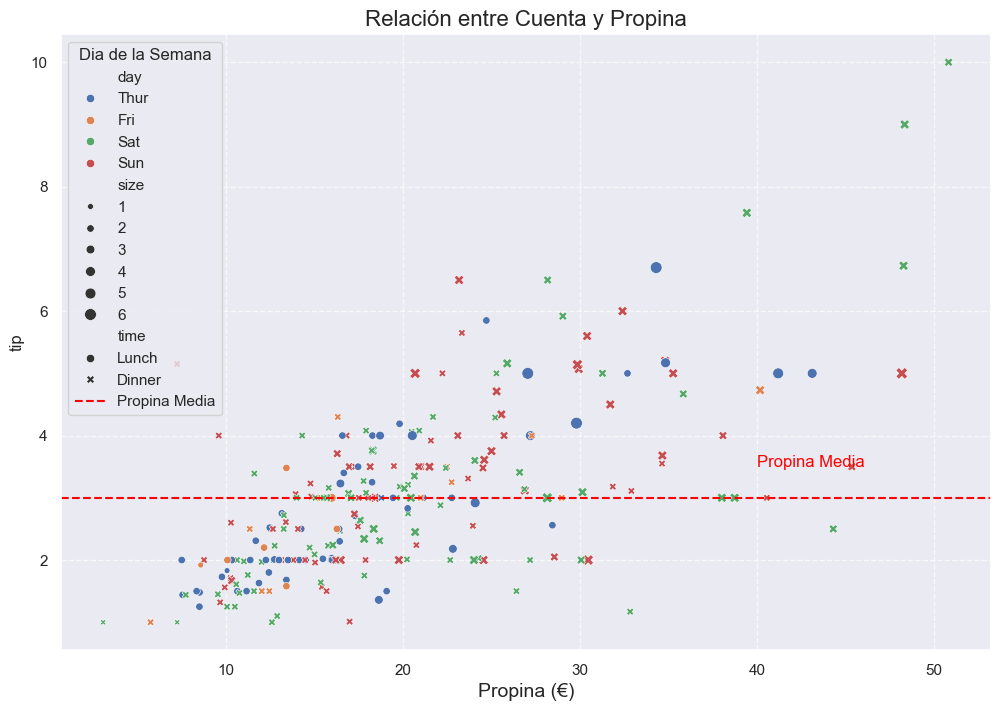

In [9]:
# set de datos de ejemplo
penguins = sns.load_dataset('penguins')

# tema
sns.set_theme(style="dark", palette="colorblind")
plt.figure(figsize=(10,6))
sns.barplot(data=penguins, x='species', y='flipper_length_mm')
plt.title('Longitud de aleta por especie de pingüino')
plt.show()

# cambiar la paleta de colores 
sns.set_theme(style="dark", color_codes=True)
plt.figure(figsize=(10,6))
sns.barplot(data=tips, x='day', y='total_bill', hue='day', palette='magma',legend=False)
plt.title('cuenta promedio por día')
plt.show()

# combinación Seaborn y Matplotlib
plt.figure(figsize=(12,8))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', style='time', size='size')
plt.title('Relación entre Cuenta y Propina', fontsize=16)
plt.xlabel('Cuenta Total (€)', fontsize=14)
plt.xlabel('Propina (€)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=tips['tip'].mean(), color='red', linestyle='--', label='Propina Media')
plt.text(40, tips['tip'].mean() + 0.5, 'Propina Media', color='red', fontsize=12)
plt.legend(title='Dia de la Semana', title_fontsize=12, loc='upper left')
plt.show()

CASO PRÁCTICO. ANÁLISIS EXPLORATORIO DE DATOS

In [10]:
# dataframe simulado de ventas
np.random.seed(42)
n = 500

data = {
    'fecha': pd.date_range(start='2024-01-01', periods=n, freq='D'),
    'producto': np.random.choice(['A', 'B', 'C', 'D'], size=n),
    'categoria': np.random.choice(['Electrónica', 'Ropa', 'Hogar', 'Alimentos'], size=n),
    'region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste', 'Centro'], size=n),
    'precio': np.random.normal(loc=100, scale=30, size=n),
    'cantidad': np.random.randint(1,10,size=n),
    'descuento': np.random.choice([0, 0.05, 0.1, 0.2], size=n),
    'satisfaccion': np.random.randint(1, 6, size=n) 
}

ventas = pd.DataFrame(data)
ventas['total'] = (ventas['precio'] * ventas['cantidad']) - (1 - ventas['descuento']).round(2) 
ventas['mes'] = ventas['fecha'].dt.month_name()
ventas['dia_semana'] = ventas['fecha'].dt.day_name()

ventas.head()

,fecha,producto,categoria,region,precio,cantidad,descuento,satisfaccion,total,mes,dia_semana
0,2024-01-01,C,Hogar,Norte,130.153065,7,0.05,3,910.121454,January,Monday
1,2024-01-02,D,Electrónica,Norte,84.776881,6,0.05,5,507.711289,January,Tuesday
2,2024-01-03,A,Electrónica,Norte,90.120070,6,0.10,3,539.820420,January,Wednesday
3,2024-01-04,C,Alimentos,Centro,97.095219,5,0.00,1,484.476094,January,Thursday
4,2024-01-05,C,Hogar,Oeste,85.734084,6,0.00,3,513.404502,January,Friday


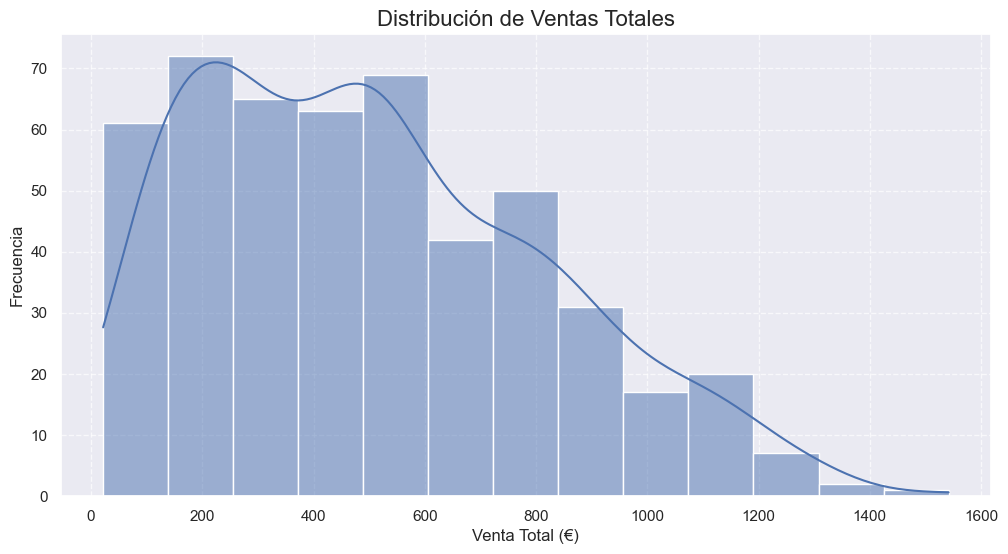

In [11]:
# ventas totales
plt.figure(figsize=(12,6))
sns.histplot(data=ventas, x='total', kde=True)
plt.title('Distribución de Ventas Totales', fontsize=16)
plt.xlabel('Venta Total (€)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

C:\Users\ander\AppData\Local\Temp\ipykernel_7152\2361508855.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Categoría', title_fontsize=12)


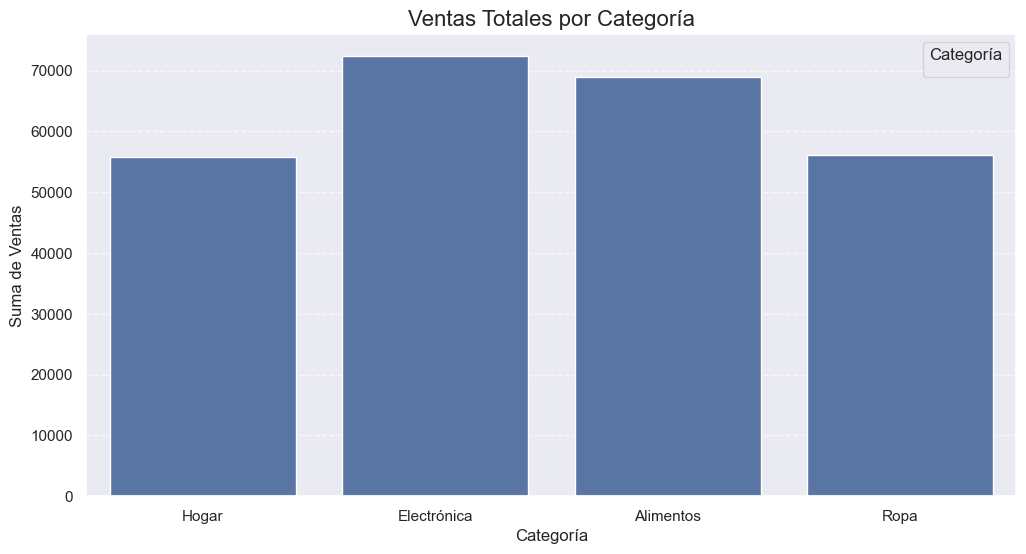

In [12]:
# ventas por categoría
plt.figure(figsize=(12,6))
sns.barplot(data=ventas, x='categoria', y='total', estimator='sum', errorbar=None)
plt.title('Ventas Totales por Categoría', fontsize = 16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Suma de Ventas', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Categoría', title_fontsize=12)
plt.show()

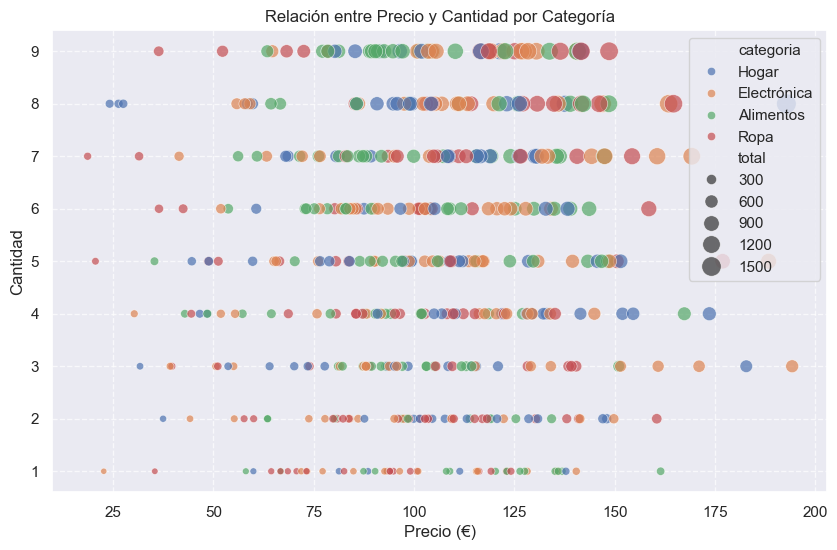

In [15]:
# Relación entre Precio y Cantidad
plt.figure(figsize=(10,6))
sns.scatterplot(data=ventas, x='precio', y='cantidad',
                hue='categoria', size='total', 
                sizes=(20,200), alpha=0.7)
plt.title('Relación entre Precio y Cantidad por Categoría')
plt.xlabel('Precio (€)', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.grid(True, linestyle='--', alpha=.7)


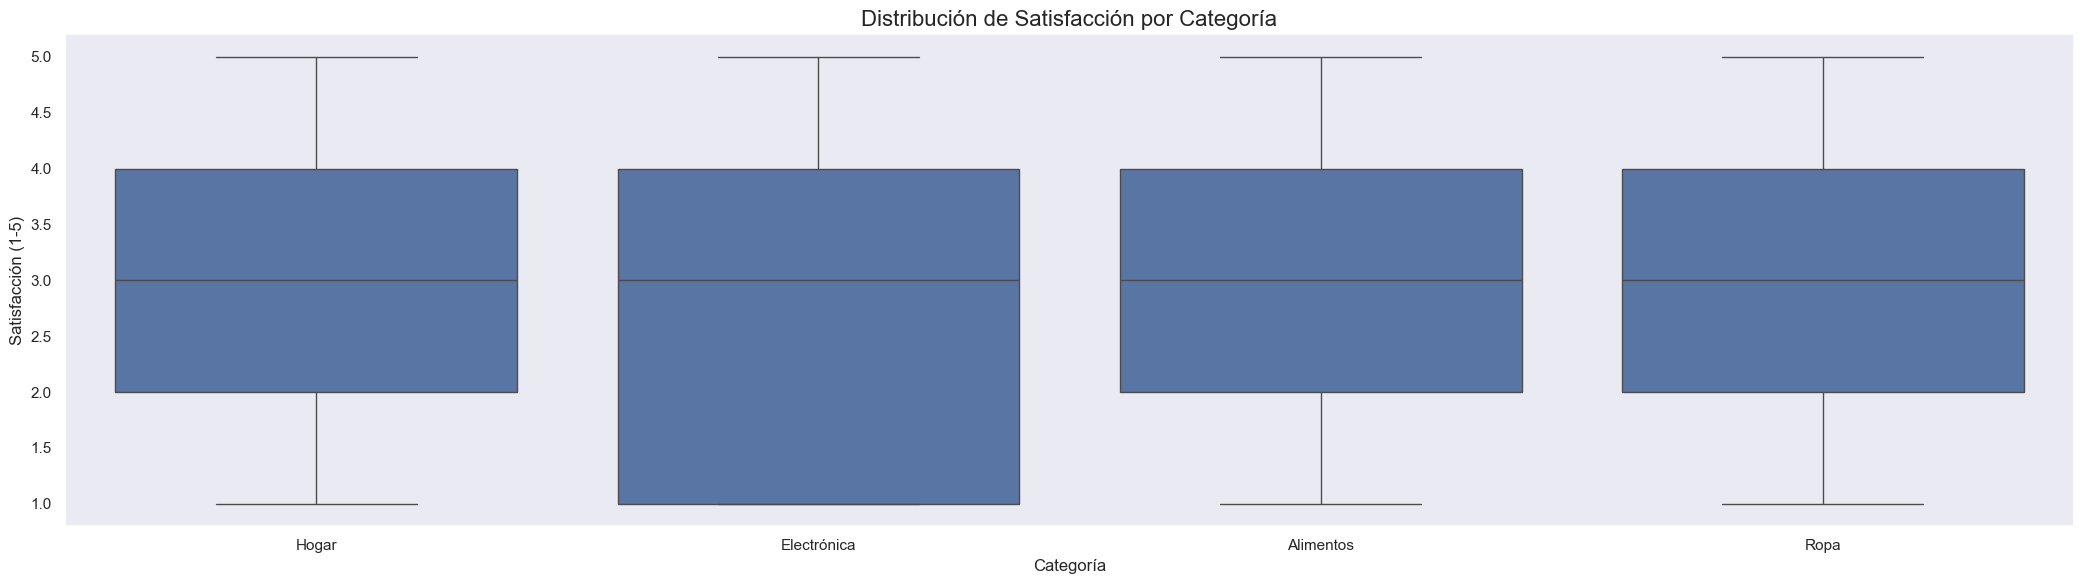

In [16]:
# Distribución de satisfacción por categoría
plt.figure(figsize=(21,6))
sns.boxplot(data=ventas, x='categoria', y='satisfaccion')
plt.title('Distribución de Satisfacción por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Satisfacción (1-5)', fontsize=12)
plt.tight_layout()
plt.show()


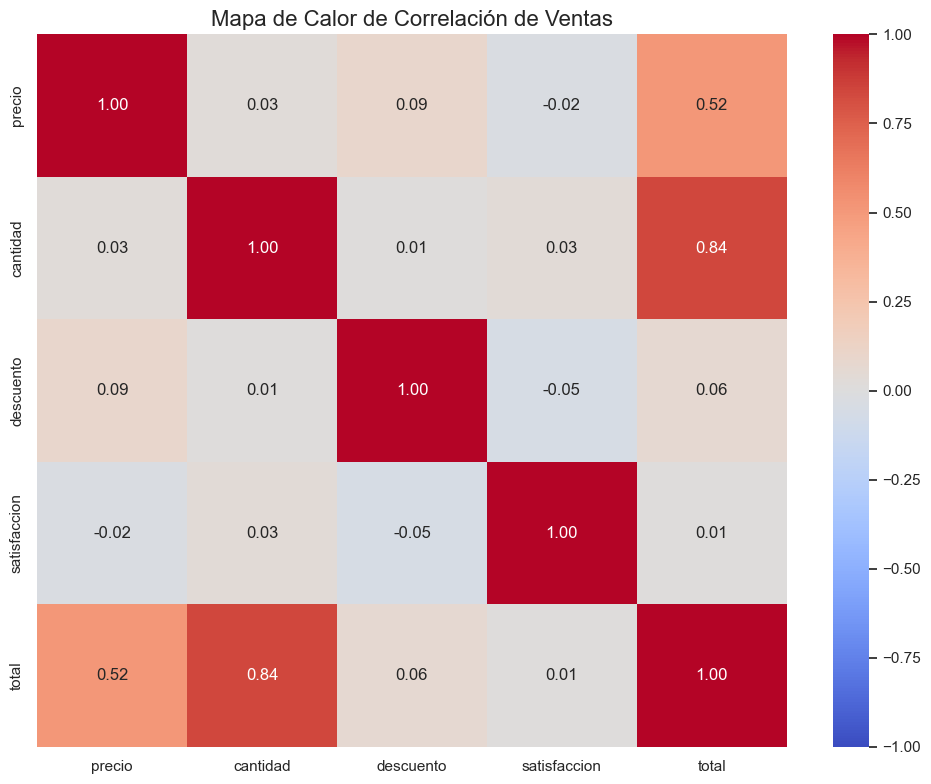

In [18]:
# Mapa de calor de correlación
corr = ventas[['precio', 'cantidad', 'descuento', 'satisfaccion', 'total']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación de Ventas', fontsize=16)
plt.tight_layout()
plt.show()